<a href="https://colab.research.google.com/github/melindahandoyo1992/Customer-purchase-behavior-analysis/blob/main/NOTEBOOK_PURCHASE_BEHAVIOR_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/electronic_sales.csv')
data

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [3]:
# Filtered by the order status that is completed
data_completed = data[data['Order Status'] == 'Completed']


In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data_completed = data_completed.dropna(subset=['Gender'])

In [6]:
data.isna().sum()

,0
Customer ID,0
Age,0
Gender,1
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


Retention rate
- This section focus on overall retention rate

In [7]:
data_completed['Purchase Date'] = pd.to_datetime(data['Purchase Date'])


In [8]:
# Identify each customer's first purchase as the basis for retention analysis
first_purchase = data_completed.groupby('Customer ID')['Purchase Date'].min().reset_index()
first_purchase.rename(columns={'Purchase Date':'First_purchase'}, inplace=True)

In [9]:
data_completed = data_completed.merge(first_purchase, on='Customer ID', how='left', suffixes=('', '_first'))
data_second = data_completed[data_completed['Purchase Date'] > data_completed['First_purchase']]
second_purchase = data_second.groupby('Customer ID')['Purchase Date'].min().reset_index()
second_purchase.rename(columns={'Purchase Date':'Second_purchase'}, inplace=True)

In [10]:
retention_df = first_purchase.merge(second_purchase, on='Customer ID', how='left')
print(retention_df)

      Customer ID First_purchase Second_purchase
0            1000     2024-04-20             NaT
1            1002     2023-10-17      2024-08-09
2            1003     2024-05-21             NaT
3            1004     2024-05-26             NaT
4            1005     2024-01-30      2024-06-24
...           ...            ...             ...
9460        19988     2024-06-12             NaT
9461        19990     2024-05-05             NaT
9462        19991     2024-01-07      2024-09-08
9463        19995     2024-08-09             NaT
9464        19996     2024-04-20      2024-06-15

[9465 rows x 3 columns]


In [11]:
retained_customers = retention_df['Second_purchase'].notna().sum()
total_customers = retention_df['Customer ID'].nunique()
retention_rate = retained_customers / total_customers

print(f"Retention_rate : {retention_rate : 2%}")


Retention_rate :  32.636027%


COHORT ANALYSIS
- Analyze retention rate using cohort analysis approach

In [12]:
data_completed = data_completed.copy()

In [13]:

data_completed['Purchase Date'] = pd.to_datetime(data_completed['Purchase Date'])

In [14]:
data_completed['Purchase_month'] = data_completed['Purchase Date'].dt.to_period('M')
data_completed['Purchase_month']

,Purchase_month
0,2024-04
1,2023-10
2,2024-08
3,2024-05
4,2024-05
...,...
13426,2024-09
13427,2024-08
13428,2024-04
13429,2024-06


In [15]:
data_completed['Cohort_month'] = data_completed.groupby('Customer ID')['Purchase_month'].transform('min')
data_completed.Cohort_month

,Cohort_month
0,2024-04
1,2023-10
2,2023-10
3,2024-05
4,2024-05
...,...
13426,2024-01
13427,2024-08
13428,2024-04
13429,2024-04


In [16]:
# Months calculation right after first purchase
data_completed['Cohort_index'] = (data_completed['Purchase_month'].dt.year - data_completed['Cohort_month'].dt.year) * 12 + \
                     (data_completed['Purchase_month'].dt.month - data_completed['Cohort_month'].dt.month) + 1
data_completed.Cohort_index

,Cohort_index
0,1
1,1
2,11
3,1
4,1
...,...
13426,9
13427,1
13428,1
13429,3


In [17]:
cohort_counts = data_completed.groupby(['Cohort_month', 'Cohort_index'])['Customer ID'].nunique().unstack()
cohort_counts

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_month,,,,,,,,,,,,,
2023-09,121.0,11.0,12.0,12.0,7.0,7.0,3.0,9.0,9.0,4.0,12.0,5.0,11.0
2023-10,581.0,27.0,35.0,36.0,31.0,40.0,26.0,35.0,41.0,24.0,37.0,27.0,NaN
2023-11,482.0,21.0,39.0,24.0,34.0,27.0,24.0,29.0,32.0,27.0,19.0,NaN,NaN
2023-12,442.0,27.0,16.0,23.0,26.0,28.0,26.0,25.0,19.0,19.0,NaN,NaN,NaN
2024-01,1235.0,72.0,88.0,88.0,93.0,113.0,85.0,93.0,67.0,NaN,NaN,NaN,NaN
2024-02,1029.0,65.0,71.0,75.0,83.0,80.0,78.0,54.0,NaN,NaN,NaN,NaN,NaN
2024-03,1028.0,77.0,71.0,72.0,77.0,66.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-04,907.0,76.0,73.0,63.0,68.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05,906.0,53.0,66.0,50.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
retention_rate = cohort_counts.div(cohort_counts.iloc[:, 0], axis=0) * 100

retention_rate_display = (retention_rate.round(2).astype(str) + '%')
retention_rate_display

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_month,,,,,,,,,,,,,
2023-09,100.0%,9.09%,9.92%,9.92%,5.79%,5.79%,2.48%,7.44%,7.44%,3.31%,9.92%,4.13%,9.09%
2023-10,100.0%,4.65%,6.02%,6.2%,5.34%,6.88%,4.48%,6.02%,7.06%,4.13%,6.37%,4.65%,nan%
2023-11,100.0%,4.36%,8.09%,4.98%,7.05%,5.6%,4.98%,6.02%,6.64%,5.6%,3.94%,nan%,nan%
2023-12,100.0%,6.11%,3.62%,5.2%,5.88%,6.33%,5.88%,5.66%,4.3%,4.3%,nan%,nan%,nan%
2024-01,100.0%,5.83%,7.13%,7.13%,7.53%,9.15%,6.88%,7.53%,5.43%,nan%,nan%,nan%,nan%
2024-02,100.0%,6.32%,6.9%,7.29%,8.07%,7.77%,7.58%,5.25%,nan%,nan%,nan%,nan%,nan%
2024-03,100.0%,7.49%,6.91%,7.0%,7.49%,6.42%,5.16%,nan%,nan%,nan%,nan%,nan%,nan%
2024-04,100.0%,8.38%,8.05%,6.95%,7.5%,7.39%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2024-05,100.0%,5.85%,7.28%,5.52%,6.07%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


REPEAT PURCHASE RATE
- Filtering which customers who purchase more than 2 times

In [19]:
repeat_purchase_rate = data_completed.groupby('Customer ID')['Customer ID'].count().reset_index(name='repeat_purchase_index')


repeat_purchase_rate = repeat_purchase_rate[repeat_purchase_rate['repeat_purchase_index']>1]
repeat_purchase_rate


,Customer ID,repeat_purchase_index
1,1002,2
4,1005,2
5,1006,2
15,1025,2
19,1031,2
...,...,...
9452,19962,2
9455,19971,2
9458,19981,2
9462,19991,2


CHURN RATE

In [20]:
monthly_customer = data_completed.groupby('Purchase_month')['Customer ID'].nunique().sort_index()
monthly_customer

,Customer ID
Purchase_month,
2023-09,121
2023-10,592
2023-11,521
2023-12,510
2024-01,1344
2024-02,1179
2024-03,1281
2024-04,1231
2024-05,1317


In [21]:
churn_rate = (monthly_customer.shift(1) - monthly_customer) / monthly_customer.shift(1)
churn_rate

,Customer ID
Purchase_month,
2023-09,NaN
2023-10,-3.892562
2023-11,0.119932
2023-12,0.021113
2024-01,-1.635294
2024-02,0.122768
2024-03,-0.086514
2024-04,0.039032
2024-05,-0.069862


In [22]:
churn_table = pd.DataFrame({'Customer': monthly_customer, 'Churn_rate': churn_rate})
churn_table

,Customer,Churn_rate
Purchase_month,,
2023-09,121,NaN
2023-10,592,-3.892562
2023-11,521,0.119932
2023-12,510,0.021113
2024-01,1344,-1.635294
2024-02,1179,0.122768
2024-03,1281,-0.086514
2024-04,1231,0.039032
2024-05,1317,-0.069862


In [23]:
churn_table['churn_rate_percentage'] = (churn_table['Churn_rate']*100).round(2).astype(str) + '%'
churn_table

,Customer,Churn_rate,churn_rate_percentage
Purchase_month,,,
2023-09,121,NaN,nan%
2023-10,592,-3.892562,-389.26%
2023-11,521,0.119932,11.99%
2023-12,510,0.021113,2.11%
2024-01,1344,-1.635294,-163.53%
2024-02,1179,0.122768,12.28%
2024-03,1281,-0.086514,-8.65%
2024-04,1231,0.039032,3.9%
2024-05,1317,-0.069862,-6.99%


AVERAGE ORDER VALUE (AOV)
- Calculate average order amount

In [24]:
data_completed = data[data['Order Status'] == 'Completed']
data_completed

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,19995,69,Female,Yes,Laptop,LTP123,3,Completed,Credit Card,5394.56,674.32,8,2024-08-09,Same Day,NaN,0.00
19994,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,NaN,0.00
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98


In [25]:
Total_revenue = data_completed['Total Price'].sum().round(2)
Total_revenue

np.float64(42629615.57)

In [26]:
Total_orders = data_completed['Customer ID'].count()
Total_orders

np.int64(13432)

In [27]:
# In this section calculate overall AOV
AOV = Total_revenue / Total_orders
print(f"Average Order Value : {AOV:.2f}")

Average Order Value : 3173.74


In [28]:
data_completed = data_completed.copy()

In [29]:
data_completed['Purchase Date'] = pd.to_datetime(data_completed['Purchase Date'])

In [30]:
data_completed['Purchase_month'] = data_completed['Purchase Date'].dt.to_period('M')
data_completed['Purchase_month']

,Purchase_month
1,2024-04
2,2023-10
3,2024-08
4,2024-05
5,2024-05
...,...
19991,2024-08
19994,2024-04
19995,2024-06
19997,2024-08


In [31]:
# In this section calculate monthly AOV
monthly_AOV = (data_completed.groupby('Purchase_month')['Total Price'].sum()/data_completed.groupby('Purchase_month')['Customer ID'].count()).rename('AOV').reset_index()
monthly_AOV


,Purchase_month,AOV
0,2023-09,2287.385081
1,2023-10,2537.236313
2,2023-11,2588.671322
3,2023-12,2495.281657
4,2024-01,3228.218592
5,2024-02,3176.242999
6,2024-03,3194.351209
7,2024-04,3349.161752
8,2024-05,3255.226258
9,2024-06,3310.596523


LTV (CUSTOMER LIFETIME VALUE)
- Calculate value of customers towards the business

In [32]:
total_purchase = data_completed.groupby('Customer ID')['Total Price'].sum()

In [33]:
total_orders2 = data_completed.groupby('Customer ID')['Customer ID'].count()

In [34]:
AOV_percustomer = total_purchase / total_orders2
AOV_percustomer.rename('AOV', inplace=True)

,AOV
Customer ID,
1000,741.090000
1002,2510.300000
1003,41.500000
1004,83.000000
1005,5889.555000
...,...
19990,9117.440000
19991,6184.030000
19995,5394.560000


In [35]:
purchase_frequency = data_completed.groupby('Customer ID')['Customer ID'].count().rename('Purchase_frequency')
purchase_frequency

,Purchase_frequency
Customer ID,
1000,1
1002,2
1003,1
1004,1
1005,2
...,...
19990,1
19991,2
19995,1


In [36]:
customer_lifespan = (data_completed.groupby('Customer ID')['Purchase Date'].max()-data_completed.groupby('Customer ID')['Purchase Date'].min()).dt.days / 30
customer_lifespan.rename('Customer_lifespan', inplace=True)

,Customer_lifespan
Customer ID,
1000,0.000000
1002,9.900000
1003,0.000000
1004,0.000000
1005,4.866667
...,...
19990,0.000000
19991,8.166667
19995,0.000000


In [37]:
LTV = AOV_percustomer * purchase_frequency * customer_lifespan
LTV

,0
Customer ID,
1000,0.000000
1002,49703.940000
1003,0.000000
1004,0.000000
1005,57325.002000
...,...
19990,0.000000
19991,101005.823333
19995,0.000000


In [38]:
LTV_TABLE = pd.DataFrame({'AOV':AOV_percustomer, 'Purchase_frequency':purchase_frequency, 'Customer_lifespan':customer_lifespan, 'LTV':LTV}).reset_index()
LTV_TABLE

,Customer ID,AOV,Purchase_frequency,Customer_lifespan,LTV
0,1000,741.090000,1,0.000000,0.000000
1,1002,2510.300000,2,9.900000,49703.940000
2,1003,41.500000,1,0.000000,0.000000
3,1004,83.000000,1,0.000000,0.000000
4,1005,5889.555000,2,4.866667,57325.002000
...,...,...,...,...,...
9461,19990,9117.440000,1,0.000000,0.000000
9462,19991,6184.030000,2,8.166667,101005.823333
9463,19995,5394.560000,1,0.000000,0.000000
9464,19996,4021.006667,3,4.266667,51468.885333


In [39]:
# In this section Customers who categorized in 'No revenue' LTV segment would be excluded, then the rest of the customers divided into 3 tiers using quantile-based statistica approach.

LTV_TABLE['LTV_segment'] = 'No Revenue'

mask = LTV_TABLE['LTV'] > 0
LTV_TABLE.loc[mask, 'LTV_segment'] = pd.qcut(
    LTV_TABLE.loc[mask, 'LTV'],
    q=3,
    labels=['Low Value', 'Mid Value', 'High Value']
)

In [40]:
LTV_TABLE

,Customer ID,AOV,Purchase_frequency,Customer_lifespan,LTV,LTV_segment
0,1000,741.090000,1,0.000000,0.000000,No Revenue
1,1002,2510.300000,2,9.900000,49703.940000,High Value
2,1003,41.500000,1,0.000000,0.000000,No Revenue
3,1004,83.000000,1,0.000000,0.000000,No Revenue
4,1005,5889.555000,2,4.866667,57325.002000,High Value
...,...,...,...,...,...,...
9461,19990,9117.440000,1,0.000000,0.000000,No Revenue
9462,19991,6184.030000,2,8.166667,101005.823333,High Value
9463,19995,5394.560000,1,0.000000,0.000000,No Revenue
9464,19996,4021.006667,3,4.266667,51468.885333,High Value


RFM AND CLUSTERING
- Analyze customer using recency, frequency and monetary then categorize them into certain segmentation

RECENCY
- The distance between last purchase to the reference date

In [41]:
data_completed['Purchase Date'].dtype

dtype('<M8[ns]')

In [42]:
data_completed['Purchase Date'] = pd.to_datetime(data_completed['Purchase Date'], errors = 'coerce')


In [43]:
last_purchase = data_completed.groupby('Customer ID')['Purchase Date'].max()
last_purchase

,Purchase Date
Customer ID,
1000,2024-04-20
1002,2024-08-09
1003,2024-05-21
1004,2024-05-26
1005,2024-06-24
...,...
19990,2024-05-05
19991,2024-09-08
19995,2024-08-09


In [44]:
# Determine the reference date to find the anchor in order to calculate the recency
reference_date = data_completed['Purchase Date'].max() + pd.Timedelta(days=1)

In [45]:
recency = (reference_date - last_purchase).dt.days
recency = recency.reset_index()
recency.columns = ['Customer ID','Recency']
recency

,Customer ID,Recency
0,1000,157
1,1002,46
2,1003,126
3,1004,121
4,1005,92
...,...,...
9461,19990,142
9462,19991,16
9463,19995,46
9464,19996,29


FREQUENCY
- Calculation of how often customer had purchased

In [46]:
frequency = data_completed.groupby('Customer ID').agg(Frequency=('Customer ID', 'count')).reset_index()
frequency

,Customer ID,Frequency
0,1000,1
1,1002,2
2,1003,1
3,1004,1
4,1005,2
...,...,...
9461,19990,1
9462,19991,2
9463,19995,1
9464,19996,3


MONETARY
- Calculate revenue that has been generated per customer

In [47]:
monetary = data_completed.groupby('Customer ID')['Total Price'].sum().reset_index()
monetary.columns = ['Customer ID','Monetary']
monetary

,Customer ID,Monetary
0,1000,741.09
1,1002,5020.60
2,1003,41.50
3,1004,83.00
4,1005,11779.11
...,...,...
9461,19990,9117.44
9462,19991,12368.06
9463,19995,5394.56
9464,19996,12063.02


In [48]:
RFM_TABLE = recency.merge(frequency, on='Customer ID').merge(monetary, on='Customer ID')
RFM_TABLE

,Customer ID,Recency,Frequency,Monetary
0,1000,157,1,741.09
1,1002,46,2,5020.60
2,1003,126,1,41.50
3,1004,121,1,83.00
4,1005,92,2,11779.11
...,...,...,...,...
9461,19990,142,1,9117.44
9462,19991,16,2,12368.06
9463,19995,46,1,5394.56
9464,19996,29,3,12063.02


SCORING RFM
- Giving scores for RFM segmentation

In [49]:
RFM_TABLE['R_scores'] = pd.qcut(RFM_TABLE['Recency'],5,labels=[5,4,3,2,1])

In [50]:
RFM_TABLE['F_scores'] = pd.qcut(RFM_TABLE['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])

In [51]:
RFM_TABLE['M_scores'] = pd.qcut(RFM_TABLE['Monetary'].rank(method='first'),5,labels=[1,2,3,4,5])

In [52]:
RFM_TABLE.columns

Index(['Customer ID', 'Recency', 'Frequency', 'Monetary', 'R_scores',
       'F_scores', 'M_scores'],
      dtype='object')

In [53]:
RFM_TABLE['RFM_SCORE'] = (RFM_TABLE['R_scores'].astype(str) + RFM_TABLE['F_scores'].astype(str) + RFM_TABLE['M_scores'].astype(str))

In [54]:
RFM_TABLE

,Customer ID,Recency,Frequency,Monetary,R_scores,F_scores,M_scores,RFM_SCORE
0,1000,157,1,741.09,3,1,1,311
1,1002,46,2,5020.60,5,4,4,544
2,1003,126,1,41.50,3,1,1,311
3,1004,121,1,83.00,3,1,1,311
4,1005,92,2,11779.11,4,4,5,445
...,...,...,...,...,...,...,...,...
9461,19990,142,1,9117.44,3,4,5,345
9462,19991,16,2,12368.06,5,5,5,555
9463,19995,46,1,5394.56,5,4,4,544
9464,19996,29,3,12063.02,5,5,5,555


CLUSTERING RFM
- In this section, customers are clustered based on similar RFM patterns to uncover natural behavioral groups.


In [55]:
rfm_values = RFM_TABLE[['Customer ID','Recency','Frequency','Monetary']]


In [56]:
#  Standardize RFM features so they are on the same scale before clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(rfm_values[['Recency', 'Frequency', 'Monetary']])

In [57]:
# Use the Elbow Method to determine the optimal number of clusters (k)
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=50)
    km.fit(scaled)
    inertia.append(km.inertia_)

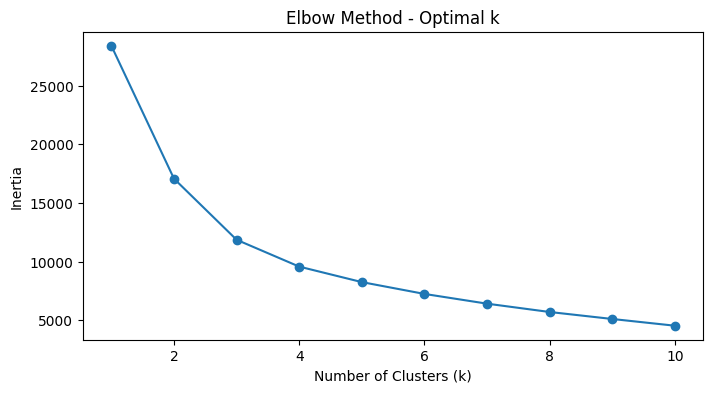

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal k')
plt.show()

### Choosing the Number of Clusters (k)

The Elbow Method was used to select the optimal number of clusters.  
Based on the inertia curve, the rate of decrease slows significantly after k = 5,  
indicating diminishing returns beyond this point.  

Therefore, k = 5 was chosen as a balance between model simplicity and cluster separation.

In [59]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=50)
kmeans.fit(scaled)
rfm_values = rfm_values.copy()
rfm_values['Cluster'] = kmeans.labels_

In [60]:
rfm_values['Cluster'].value_counts()

,count
Cluster,
2,3225
1,3065
4,1471
3,1187
0,518


In [61]:
cluster_summary = rfm_values.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,69.451737,3.295367,12520.797838
1,249.221533,1.053181,2834.886303
2,84.128682,1.000000,2911.996050
3,109.136479,1.798652,10124.434566
4,85.135962,2.132563,4110.145942


In [62]:
cluster_labels = {
    0: 'Champions',
    1: 'New/recent',
    2: 'Potential Loyalist',
    3: 'Loyal',
    4: 'At risk'
}

# Create a new column in RFM table with the segment names
rfm_values['Segment'] = rfm_values['Cluster'].map(cluster_labels)

# Check the result
rfm_values = rfm_values.copy()
rfm_values[['Recency','Frequency','Monetary','Cluster','Segment']]

,Recency,Frequency,Monetary,Cluster,Segment
0,157,1,741.09,2,Potential Loyalist
1,46,2,5020.60,4,At risk
2,126,1,41.50,2,Potential Loyalist
3,121,1,83.00,2,Potential Loyalist
4,92,2,11779.11,3,Loyal
...,...,...,...,...,...
9461,142,1,9117.44,3,Loyal
9462,16,2,12368.06,3,Loyal
9463,46,1,5394.56,2,Potential Loyalist
9464,29,3,12063.02,0,Champions


In [63]:
rfm_values['Segment'].value_counts()

,count
Segment,
Potential Loyalist,3225
New/recent,3065
At risk,1471
Loyal,1187
Champions,518


### Mapping Clusters to Business Segments

The numeric cluster labels produced by KMeans are mapped to
business-meaningful customer segments based on their relative
Recency, Frequency, and Monetary patterns.

In [64]:
rfm_values.loc[:, 'Segment'] = rfm_values['Cluster'].map(cluster_labels)

In [65]:
rfm_values.head(15)

,Customer ID,Recency,Frequency,Monetary,Cluster,Segment
0,1000,157,1,741.09,2,Potential Loyalist
1,1002,46,2,5020.60,4,At risk
2,1003,126,1,41.50,2,Potential Loyalist
3,1004,121,1,83.00,2,Potential Loyalist
4,1005,92,2,11779.11,3,Loyal
5,1006,91,2,6645.94,4,At risk
6,1008,365,1,3379.32,1,New/recent
7,1011,79,1,7911.90,2,Potential Loyalist
8,1014,129,1,4747.14,2,Potential Loyalist
9,1015,22,1,83.00,2,Potential Loyalist


In [66]:
segment_summary = rfm_values.groupby('Segment')[['Recency','Frequency','Monetary']].mean()
segment_counts = rfm_values['Segment'].value_counts()

print(segment_summary)
print(segment_counts)

                       Recency  Frequency      Monetary
Segment                                                
At risk              85.135962   2.132563   4110.145942
Champions            69.451737   3.295367  12520.797838
Loyal               109.136479   1.798652  10124.434566
New/recent          249.221533   1.053181   2834.886303
Potential Loyalist   84.128682   1.000000   2911.996050
Segment
Potential Loyalist    3225
New/recent            3065
At risk               1471
Loyal                 1187
Champions              518
Name: count, dtype: int64


WHICH CUSTOMER CONTRIBUTES REVENUE?

In [67]:
revenue_by_segment = rfm_values.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)
revenue_by_segment

,Monetary
Segment,
Loyal,12017703.83
Potential Loyalist,9391187.26
New/recent,8688926.52
Champions,6485773.28
At risk,6046024.68


CHURN RISK BY SEEING THE SEGMENT

In [68]:
recency_by_segment = rfm_values.groupby('Segment')['Recency'].mean().sort_values(ascending=False)
recency_by_segment

,Recency
Segment,
New/recent,249.221533
Loyal,109.136479
At risk,85.135962
Potential Loyalist,84.128682
Champions,69.451737


SEGMENT VOLUME

In [69]:
count_by_segment = rfm_values['Segment'].value_counts()
count_by_segment

,count
Segment,
Potential Loyalist,3225
New/recent,3065
At risk,1471
Loyal,1187
Champions,518


WHICH PRODUCT THAT DRIVE REPEAT PURCHASE OR CONVERSION?

In [70]:
product_purchase = data_completed.groupby('Product Type')['Customer ID'].count().sort_values(ascending=False)
product_purchase

,Customer ID
Product Type,
Smartphone,4004
Tablet,2745
Laptop,2686
Smartwatch,2636
Headphones,1361


In [71]:
product_purchase2 = data_completed.groupby(['Customer ID','Product Type'])['Product Type'].count().unstack(fill_value=0)

product_purchase2 = product_purchase2[product_purchase2 >= 2].dropna(how='all').reset_index()
product_purchase2

Product Type,Customer ID,Headphones,Laptop,Smartphone,Smartwatch,Tablet
0,1035,NaN,NaN,2.0,NaN,NaN
1,1038,NaN,NaN,2.0,2.0,NaN
2,1059,NaN,2.0,NaN,NaN,NaN
3,1073,NaN,NaN,NaN,NaN,2.0
4,1079,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...
981,19828,NaN,NaN,NaN,NaN,2.0
982,19839,NaN,NaN,NaN,NaN,2.0
983,19842,NaN,NaN,NaN,3.0,NaN
984,19911,NaN,NaN,NaN,NaN,2.0


PURCHASE FREQUENCY

In [72]:
purchase_freq = data_completed.groupby('Customer ID')['Customer ID'].count().reset_index(name='order_count')
purchase_freq

,Customer ID,order_count
0,1000,1
1,1002,2
2,1003,1
3,1004,1
4,1005,2
...,...,...
9461,19990,1
9462,19991,2
9463,19995,1
9464,19996,3


In [73]:
purchase_freq = purchase_freq.merge(rfm_values[['Customer ID','Segment']], on= 'Customer ID', how='left')
purchase_freq

,Customer ID,order_count,Segment
0,1000,1,Potential Loyalist
1,1002,2,At risk
2,1003,1,Potential Loyalist
3,1004,1,Potential Loyalist
4,1005,2,Loyal
...,...,...,...
9461,19990,1,Loyal
9462,19991,2,Loyal
9463,19995,1,Potential Loyalist
9464,19996,3,Champions


AVERAGE ORDERS PER SEGMENT

In [74]:
avg_orders_segment = purchase_freq.groupby('Segment')['order_count'].mean().reset_index()
avg_orders_segment

,Segment,order_count
0,At risk,2.132563
1,Champions,3.295367
2,Loyal,1.798652
3,New/recent,1.053181
4,Potential Loyalist,1.000000


TIME BETWEEN ORDERS

In [75]:
data_sorted = data_completed.sort_values(['Customer ID', 'Purchase Date'])
data_sorted['Purchase Date'] = pd.to_datetime(data_sorted['Purchase Date'])
data_sorted['Days_Between'] = data_sorted.groupby('Customer ID')['Purchase Date'].diff().dt.days

In [76]:
data_sorted = data_sorted.merge(rfm_values[['Customer ID','Segment']], on='Customer ID', how='left')

In [77]:
avg_days_segment = data_sorted.groupby('Segment')['Days_Between'].mean().reset_index()
avg_days_segment

,Segment,Days_Between
0,At risk,108.764106
1,Champions,71.481077
2,Loyal,98.280591
3,New/recent,43.092025
4,Potential Loyalist,NaN


PRODUCT CATEGORY ANALYSIS

In [78]:
data_completed = data_completed.merge(
    rfm_values[['Customer ID', 'Segment']],
    on='Customer ID',
    how='left'
)

In [79]:
product_counts = data_completed.groupby(['Segment','Product Type'])['Customer ID'].count().reset_index()
product_counts.columns = ['Segment', 'product_type', 'order_count']


In [80]:
product_pivot = product_counts.pivot(index='product_type', columns='Segment', values='order_count').fillna(0).reset_index()
product_pivot

Segment,product_type,At risk,Champions,Loyal,New/recent,Potential Loyalist
0,Headphones,377,188,140,249,407
1,Laptop,617,363,376,690,640
2,Smartphone,902,483,803,990,826
3,Smartwatch,583,346,419,593,695
4,Tablet,658,327,397,706,657
